# Stock Analysis of Recession Resilient Companies

## Introduction

In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from dateutil import relativedelta
%matplotlib inline

In [2]:
#Function to provide financial data when called
def readmydata(tickers, start_date, end_date):
    financial_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
    df = pd.DataFrame(financial_data)
    output = df.stack(level=-1)
    return output

In [3]:
#Function takes as input dataframe and picks columns
def pickmydata(data_pack, attributes, num_days):
    col = data_pack[attributes]
    col.head()
    mytickers_name = data_pack.index.get_level_values('Symbols')
    mytickers_name = mytickers_name.unique()
    for x in mytickers_name:      
        #Query dataframe for the columns user asked for
        data_ticker = data_pack[data_pack.index.get_level_values('Symbols') == x]
        #Object series indexed by date
        data_ticker_attributes = col.loc[:, x]
        #20-day moving average
        short_rolling_tickers = data_ticker_attributes.rolling(window = num_days).mean()
        #Plot num_days referring to how many days are in a unit of rolling average
        fig, ax = plt.subplots(figsize=(9,5))
        ax.plot(data_ticker_attributes.index, data_ticker_attributes, label=x)
        ax.plot(short_rolling_tickers.index, short_rolling_tickers, label= 'Rolling average')
        ax.set_xlabel('Date')
        #Find only requested ticker
        ax.set_ylabel(attributes + ' Price ($)')
        ax.legend()
        output = data_ticker_attributes.describe()
    return output

In [4]:
#Function to calculate daily returns of each stock (Difference/og Price or Log(D/OG))
def stockreturns(data_pack, type_return):
    adjclose = pd.DataFrame(data_pack['Adj Close'])
    adjclose = adjclose.unstack()
    #if loop for log or relative
    if type_return == 'log' or 'logarithm':
        adjclose_ret = np.log(adjclose).diff()
    else:
        adjclose_ret = adjclose.pct_change()
    output = adjclose_ret
    return output

In [21]:
#Cumulative/Daily return plot
def return_plot(dataframe, type_plot):
    if type_plot == 'cumulative':
        cumulative_return = dataframe.cumsum()
        fig = plt.figure()
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.plot(cumulative_return)
        ax1.set_xlabel('Date')
        ax1.set_ylabel("Cumulative Returns")
        ax1.set_title("Stock Cumulative Returns")
        plt.gcf().autofmt_xdate()
        plt.show();
    else:
        fig = plt.figure()
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.plot(dataframe)
        ax1.set_xlabel('Date')
        ax1.set_ylabel("Relative Returns")
        ax1.set_title("Stock Relative Returns")
        plt.gcf().autofmt_xdate()
        ax1.legend()
        plt.show();

In [22]:
def portfolio_ret(dataframe, dataframe1, start_date = sd, end_date = ed ):  
    #Plotting Portfolio Returns
    start_price = [1]
    weighted_df = dataframe
    ret_total = weighted_df.sum(axis=1) + start_price
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    ax.plot(ret_total)
    ax.set_xlabel('Date')
    ax.set_ylabel("Portfolio Returns")
    ax.set_title("Stock Relative Returns")
    plt.gcf().autofmt_xdate()
    plt.show();

    #Relative Returns
    df = dataframe.stack(level=-1)
    df = df.mean(axis=0)
    df = start_price + df
    df = round(df, 6)
    value = df.values
    ret = ','.join([str(i) for i in value])
    
    #Annualized Returns
    d1 = sd
    d2 = ed
    start_date = datetime.strptime(d1, "%Y-%m-%d")
    end_date = datetime.strptime(d2, "%Y-%m-%d")
    delta = relativedelta.relativedelta(end_date, start_date)
    months = delta.months
    ann_ret = (([1] + df) ** (12 / months)) - 1
    ann_ret = round(ann_ret, 6)
    value = ann_ret.values
    ann_ret = ','.join([str(i) for i in value])
    
    #Volatility
    dif = ret_total - ret_total.mean(axis=0)
    square = dif**2
    sum = square.sum() / len(square)
    standard_dev = np.sqrt(sum)
 
    #Sharpe
    adjclose = data_pack['Adj Close']
    adjclose_ret = np.log(adjclose).diff()
    sharpe = data_pack['Adj Close'].mean() / data_pack['Adj Close'].std() 
    
    #Drawdown
    adjclose = pd.DataFrame(data_pack['Adj Close'])
    adjclose = adjclose.unstack()
    rolling_max = adjclose.cummax()
    df = (adjclose - rolling_max) / rolling_max
    df = df.stack(level=-1)
    df = df.mean(axis=0)
    drawdowns = round(df, 6)
    value = drawdowns.values
    drawdown = ','.join([str(i) for i in value])
    
    #Dataframe
    data = [['# of Securities', 6], ['Relative Return', ret], 
            ['Annualized return', ann_ret], ['Volatility', standard_dev], ['Sharpe', sharpe],
            ['Drawdown', drawdown]]
    output = pd.DataFrame(data, columns=['Portfolio', "John Doe's Portfolio"]) #,ret_total
    
    return output

## Resilient Companies

In [26]:
sd = '2008-01-01'
ed = '2008-12-31'

In [27]:
data_plot

Adj Close                                                  
Symbols        ^GSPC       AMT         F        BA       HST       AAL
Date                                                                  
2007-12-03       NaN       NaN       NaN       NaN       NaN       NaN
2007-12-04 -0.006562 -0.056557 -0.039387 -0.019805 -0.039909 -0.015677
2007-12-05  0.015076  0.008913  0.001434  0.007858  0.025196 -0.083958
2007-12-06  0.014925 -0.016004  0.011397  0.011837  0.024060 -0.028108
2007-12-07 -0.001780  0.012495  0.000000  0.014924  0.000000  0.039682
...              ...       ...       ...       ...       ...       ...
2009-06-24  0.006503  0.058908  0.017922 -0.059884  0.030365 -0.009259
2009-06-25  0.021218  0.013187  0.008842  0.028863  0.038270  0.097422
2009-06-26 -0.001479 -0.005944 -0.012401 -0.015401  0.012438 -0.008474
2009-06-29  0.009024  0.010922  0.029853  0.018219  0.015942 -0.039051
2009-06-30 -0.008567 -0.021648  0.048955 -0.003523  0.020470  0.072526

[397 rows x 6 columns]

In [20]:
data_pack = readmydata(tickers=['^GSPC', 'WMT', 'KR', 'GIS', 'HRL', 'CPB'], start_date = sd, end_date = ed)
#data_pack.head(10)

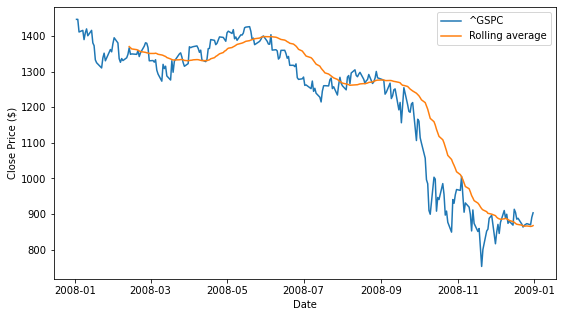

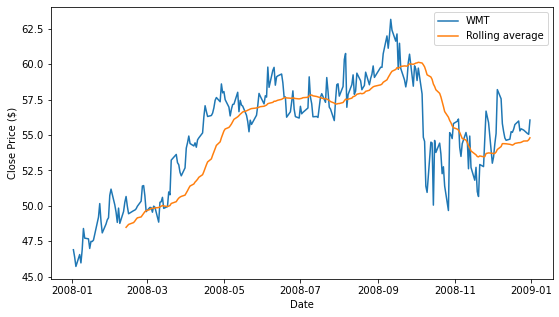

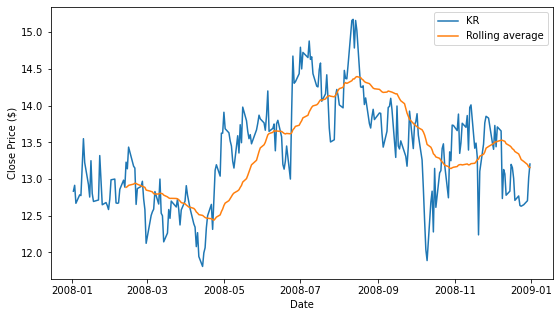

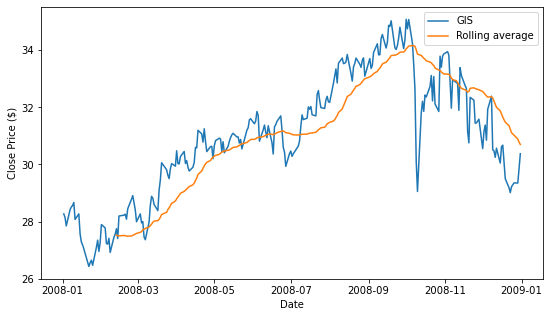

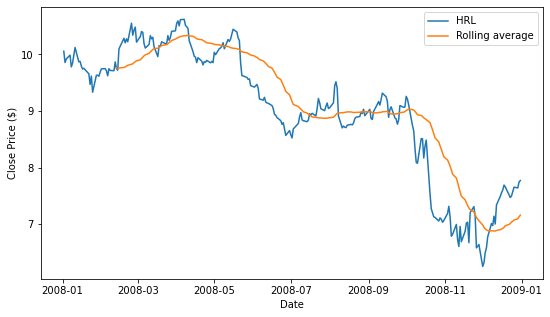

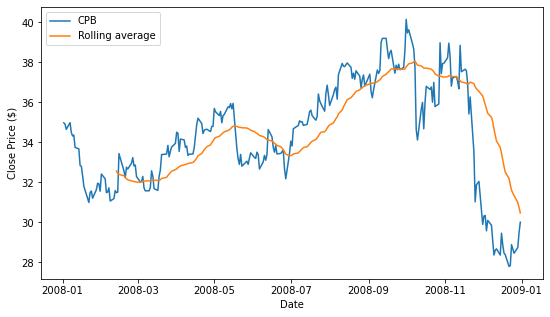

In [10]:
pickmydata(data_pack, "Close", 30)
data_plot = stockreturns(data_pack, 'relative')

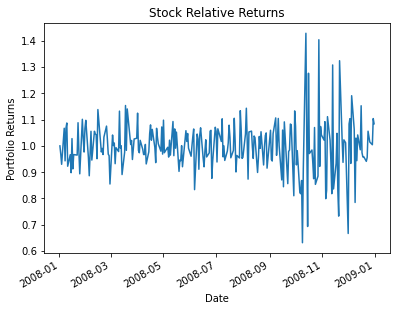

,Portfolio,John Doe's Portfolio
0,# of Securities,6
1,Relative Return,0.99967
2,Annualized return,1.129699
3,Volatility,0.097308
4,Sharpe,0.483987
5,Drawdown,-0.086867


In [11]:
portfolio_ret(data_plot, data_pack, start_date = sd, end_date = ed)

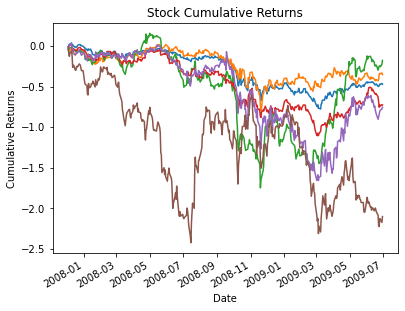

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


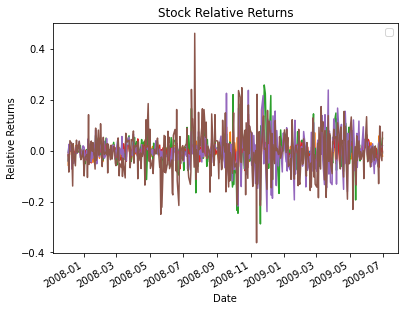

In [23]:
return_plot(data_plot, 'cumulative')
return_plot(data_plot, 'relative')

## Sensitive Companies

In [13]:
data_pack = readmydata(tickers=['^GSPC', 'AMT', 'F', 'BA', 'HST', 'AAL'], start_date='2007-12-01', end_date='2009-06-30')

#### Looking for trends, we can see that retail company stocks would hit a dip during the recession, but the precentage of the dip would be less extreme than that of the S&P.

In [14]:
data_pack.head(10)

Attributes            Adj Close        Close         High          Low  \
Date       Symbols                                                       
2007-12-03 ^GSPC    1472.420044  1472.420044  1481.160034  1470.079956   
           AMT        36.882500    44.919998    45.619999    44.750000   
           F           4.832799     7.250000     7.520000     7.230000   
           BA         67.270592    91.790001    93.199997    91.660004   
           HST        12.313079    18.766520    18.883993    18.374939   
           AAL        18.788837    19.930000    21.209999    19.820000   
2007-12-04 ^GSPC    1462.790039  1462.790039  1471.339966  1460.660034   
           AMT        34.854443    42.450001    44.389999    42.360001   
           F           4.646152     6.970000     7.240000     6.930000   
           BA         65.951416    89.989998    91.790001    89.849998   

Attributes                 Open        Volume  
Date       Symbols                             
2007-12-03 ^GSPC    1479.630005  3.323250e+09  
           AMT        45.220001  3.452200e+06  
           F           7.520000  3.493680e+07  
           BA         92.500000  5.423400e+06  
           HST        18.580519  3.745738e+06  
           AAL        21.209999  2.127800e+06  
2007-12-04 ^GSPC    1471.339966  3.343620e+09  
           AMT        44.389999  6.066100e+06  
           F           7.200000  5.544510e+07  
           BA         91.430000  7.080900e+06

count    397.000000
mean       7.024861
std        3.975925
min        1.760000
25%        3.600000
50%        6.800000
75%        8.750000
max       19.930000
Name: Close, dtype: float64

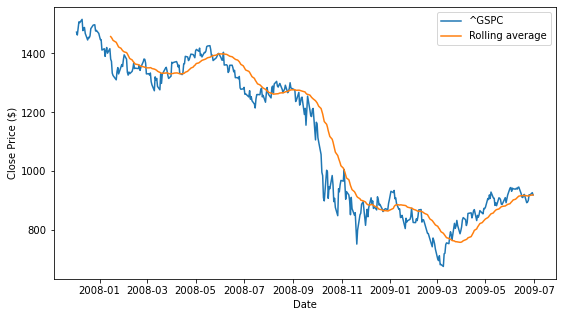

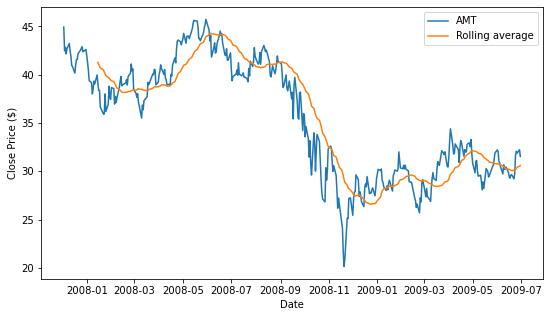

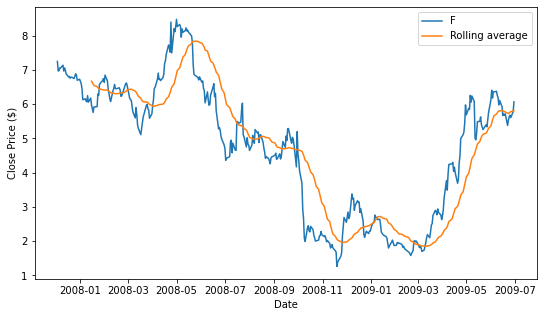

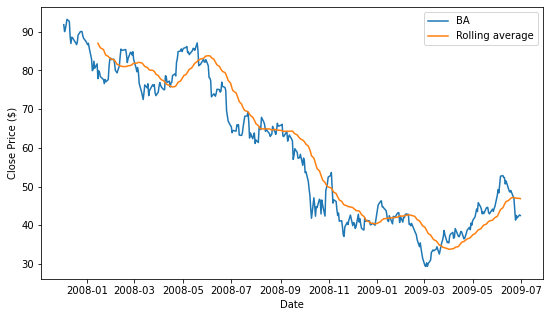

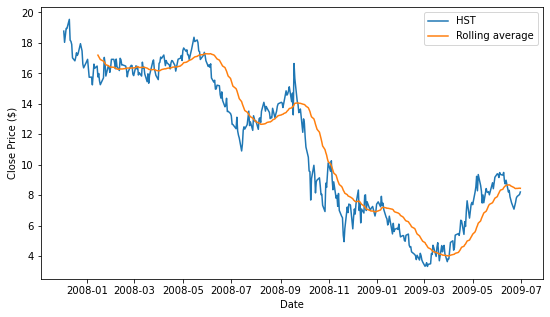

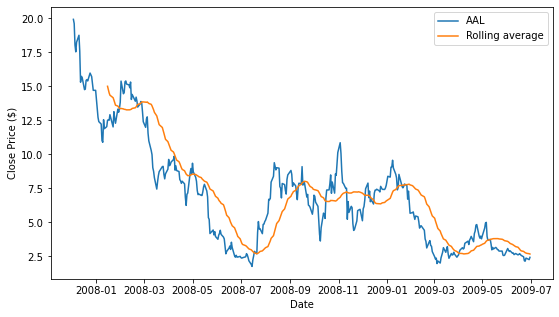

In [15]:
pickmydata(data_pack, "Close", 30)

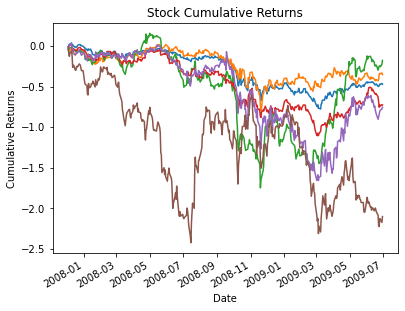

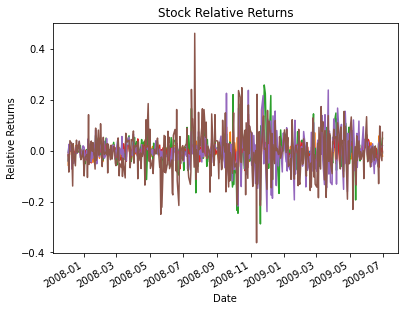

In [16]:
data_plot = stockreturns(data_pack, 'relative')
return_plot(data_plot, 'cumulative')
return_plot(data_plot, 'relative')